In [2]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# Case #1: Congressional Voting Data

After you've downloaded the data from the repository, go ahead and load it with Pandas

In [6]:
votes = pd.read_csv('../assets/datasets/votes.csv')
airport = pd.read_csv('../assets/datasets/Airport_operations.csv')

In [8]:
votes = votes.drop('Unnamed: 0', axis = 1)
votes.head()

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


Next, let's define the x and y variables: 

In [21]:
y = votes['Class']
x = votes.drop('Class', axis = 1)
x = (x.values == 'y').astype(int)
print x

[[0 1 0 ..., 1 0 1]
 [0 1 0 ..., 1 0 0]
 [0 1 1 ..., 1 0 0]
 ..., 
 [0 0 0 ..., 1 0 1]
 [0 0 0 ..., 1 0 1]
 [0 1 0 ..., 1 0 0]]


Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

In [26]:
x_standard = StandardScaler().fit_transform(x)
cov_mat = np.cov(x_standard.T)

eigenValues, eigenVectors = np.linalg.eig(cov_mat)


Now, let's check the eigenvalues: 

In [27]:
print eigenValues

[ 7.102243    1.44867882  1.1998064   0.88126251  0.8248454   0.7380054
  0.14086407  0.21188391  0.61036665  0.27622346  0.31858994  0.35967328
  0.41340487  0.54030753  0.51431461  0.45639653]


And the eigenvectors: 

In [30]:
print eigenVectors[:3]

[[-0.18803934 -0.19357121  0.07328808  0.51751543  0.35845006  0.62089874
  -0.05713493 -0.00747574  0.15602045 -0.03613906 -0.07010134 -0.20296072
   0.12290505  0.07348099  0.20525446 -0.04760145]
 [ 0.05231849 -0.5860793  -0.23045319  0.37516036  0.12646973 -0.55398342
   0.01855198 -0.10910015  0.10486865  0.0799821   0.0801356  -0.13259865
  -0.06581724  0.07925709 -0.00808044  0.26963501]
 [-0.29660826 -0.08013044 -0.16884543 -0.01308925  0.10990706  0.03068335
  -0.2133564  -0.06665988 -0.17958811 -0.23883742  0.56681358  0.45295072
   0.08181081 -0.3596669   0.23464645  0.08418781]]


To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

In [33]:
# Pair the eigens by indexing
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()

Now, calculate the explained variance. Recall the methods we learned in lesson 2.2!

In [36]:
eigenValSum = sum(eigenValues)
varianceExplained = [(i / eigenValSum)*100 for i in sorted(eigenValues, reverse=True)]

Now, calculate the explained variance and the Cumulative explained variance

In [37]:
cumulativeVarianceexplained = np.cumsum(varianceExplained)

Now, conduct the PCA using scikit learn

In [46]:
PCA_sk = PCA(n_components=2)
Y_sk = PCA_sk.fit_transform(x_standard)
pd.DataFrame(Y_sk).head()

,0,1
0,3.575171,-0.438298
1,3.694934,0.895128
2,1.710303,2.700584
3,0.313965,2.318995
4,0.678438,2.534978


# Case #2: Airport Delays

In [78]:
airport.head()
len(airport['airport'].value_counts())

77

First, let's define the x and y variables: Airport is going to be our "x" variable

In [48]:
y = airport['airport']
x = airport.drop('airport', axis = 1)


Then, standardize the x variable for analysis

In [51]:
x_standard = StandardScaler().fit_transform(x)

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

In [52]:
cov_mat = np.cov(x_standard.T)
eigenValues, eigenVectors = np.linalg.eig(cov_mat)

Then, check your eigenvalues and eigenvectors:

In [54]:
print eigenValues
print eigenVectors[:3]

[  6.45349601e+00   4.30952372e+00   1.21824879e+00   7.37875394e-01
   5.10954558e-01   3.49353222e-01   1.66799275e-01   1.20220515e-01
   7.32036815e-02   6.41924376e-02   9.59074587e-03   2.34264664e-03
   1.64364385e-04   7.01306545e-04]
[[-0.05747614  0.05252557 -0.80890976  0.38914338  0.01517249  0.40455823
   0.03918196  0.01319762 -0.14376054  0.00777298  0.03107428  0.02933693
  -0.00229607  0.001993  ]
 [ 0.11683294 -0.41190929 -0.16980855 -0.40257614  0.12274015  0.11232074
  -0.29026653 -0.06082036 -0.07665943 -0.03325464  0.02178517 -0.02057546
  -0.70799524  0.03171276]
 [ 0.1164079  -0.41158191 -0.17108429 -0.40387107  0.12540936  0.10989401
  -0.29134664 -0.06552886 -0.09065779 -0.03221664  0.03615976  0.02653745
   0.70372734 -0.03443946]]


To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

In [55]:
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()

Next, Calculate the explained variance

In [64]:
eigenValSum = sum(eigenValues)
varianceExplained = [(i / eigenValSum)*100 for i in sorted(eigenValues, reverse=True)]
cumulativeVarianceexplained = np.cumsum(varianceExplained)

Finally, conduct the PCA - use the results about to guide your selection of "n" componants

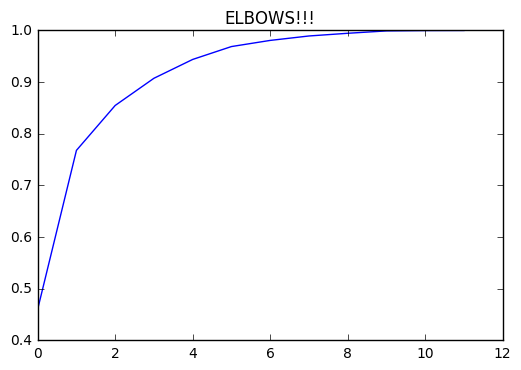

,0,1,2,3,4,5,6,7,8,9,10,11
0,-2.012558,0.667541,-1.520228,-0.686484,-0.240474,-0.666113,0.087975,0.025549,-0.104560,0.077082,0.011318,0.004174
1,-2.427122,0.612851,-1.211047,-0.603270,-0.227970,-0.649278,0.145931,-0.011412,-0.136642,-0.006526,0.006245,-0.004909
2,-1.893147,0.923550,-0.911623,-0.536109,0.056837,-0.478633,0.020849,-0.063309,-0.166373,0.031531,-0.007005,-0.021395
3,-1.476137,0.678315,-0.663351,-0.403409,0.438648,-0.240875,0.337194,-0.136831,-0.165716,0.039453,-0.016425,-0.042700
4,-2.043187,0.714364,-0.348743,-0.221570,0.349882,-0.327821,0.096722,0.033030,-0.146933,0.095856,-0.020141,0.000502


In [75]:
PCA_sk = PCA(n_components=12)
Y_sk = PCA_sk.fit_transform(x_standard)

plt.plot(np.cumsum(PCA_sk.explained_variance_ratio_))
plt.title("ELBOWS!!!")
plt.show()
pd.DataFrame(Y_sk).head()
# would pick 2, this is EDA